<a href="https://colab.research.google.com/github/Vijayaranagn/Industrial_Copper_Modeling/blob/main/Industrial_Copper_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data. 


Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer . You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.


**Import Needed packages**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/daily_offers.csv")
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
df1 = df.copy()

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# **Dealing with data in wrong format**

In [ ]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [ ]:
df["id"].value_counts()

EC06F063-9DF0-440C-8764-0B0C05A4F6AE    1
65203CB6-89D8-4BE3-ACBE-E5EDA0F5ACDC    1
3020E716-130E-4456-BD0A-57C4A519BE58    1
588AE510-4CB5-4A28-97D7-7F7A1E0BD0DD    1
15300D43-0ED4-49B2-B2CC-759D03E3EACC    1
                                       ..
679C1F30-3ABA-49F7-8B01-F50FEDD6D916    1
ACDD75A4-85DD-4E44-89E8-0E55CA952F85    1
40F88F5B-6C88-4896-81D0-DEE88A9F1C0A    1
3F6C6143-0A6D-4C87-B05E-1FC6973D173A    1
AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC    1
Name: id, Length: 181671, dtype: int64

In [ ]:
df["item_date"].unique()

array([datetime.date(2021, 4, 1), NaT, datetime.date(2021, 3, 31),
       datetime.date(2021, 3, 30), datetime.date(2021, 3, 29),
       datetime.date(2021, 3, 28), datetime.date(2021, 3, 27),
       datetime.date(2021, 3, 26), datetime.date(2021, 3, 25),
       datetime.date(2021, 3, 24), datetime.date(2021, 3, 23),
       datetime.date(2021, 3, 22), datetime.date(2021, 3, 19),
       datetime.date(2021, 3, 18), datetime.date(2021, 3, 17),
       datetime.date(2021, 3, 16), datetime.date(2021, 3, 15),
       datetime.date(2021, 3, 14), datetime.date(2021, 3, 13),
       datetime.date(2021, 3, 12), datetime.date(2021, 3, 11),
       datetime.date(2021, 3, 10), datetime.date(2021, 3, 9),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 7),
       datetime.date(2021, 3, 6), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 2), datetime.date(2021, 3, 1),
       datetime.date(2021, 2, 28), datetime.date(2021, 2, 27

In [ ]:
df["quantity tons"].unique()

array([   54.15113862,   768.0248392 ,   386.1279489 , ...,
           4.23559357, -2000.        ,   406.6865384 ])

In [ ]:
df["customer"].unique()

array([30156308., 30202938., 30153963., ..., 30349515., 30284694.,
       30161559.])

In [ ]:
df["country"].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.,  nan])

In [ ]:
df["status"].value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [ ]:
df["delivery date"].value_counts()

2021-01-01    33033
2021-04-01    31959
2020-10-01    25388
2021-07-01    21080
2021-05-01     9118
2021-03-01     8848
2020-07-01     7706
2020-12-01     7532
2021-02-01     7295
2020-11-01     7179
2021-06-01     7005
2020-09-01     6131
2020-08-01     4866
2021-08-01     3748
2021-09-01      332
2021-10-01      191
2020-01-01      129
2020-04-01       57
2020-06-01       33
2020-05-01       15
2021-12-01       12
2022-01-01        6
2019-07-01        3
2021-11-01        2
2019-04-01        1
2019-10-01        1
Name: delivery date, dtype: int64

In [ ]:
df["item type"].value_counts()

W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [ ]:
df["application"].value_counts()

10.0    77544
41.0    46261
15.0    20772
59.0     8927
42.0     5858
56.0     4846
29.0     1937
27.0     1784
26.0     1650
28.0     1591
40.0     1576
25.0     1498
79.0     1422
22.0     1023
20.0      768
66.0      718
3.0       657
38.0      511
58.0      447
4.0       286
39.0      267
65.0      247
67.0      221
68.0      181
99.0      146
19.0      143
69.0      122
5.0       110
70.0      102
2.0        34
Name: application, dtype: int64

In [ ]:
df["application"].value_counts()

In [ ]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [ ]:
missing_values_count = df.isnull().sum()
print(missing_values_count)
print(df.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


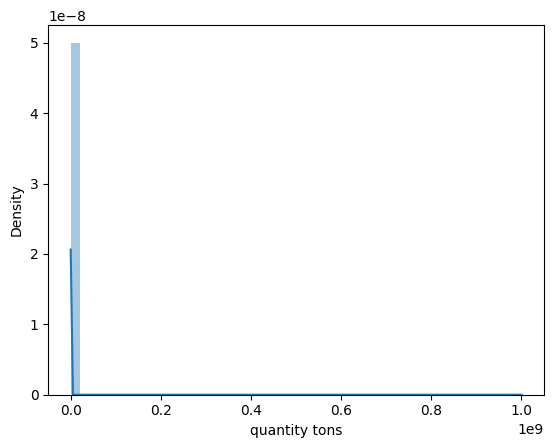

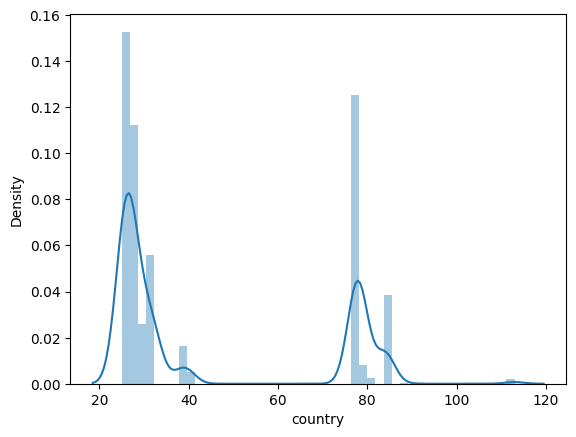

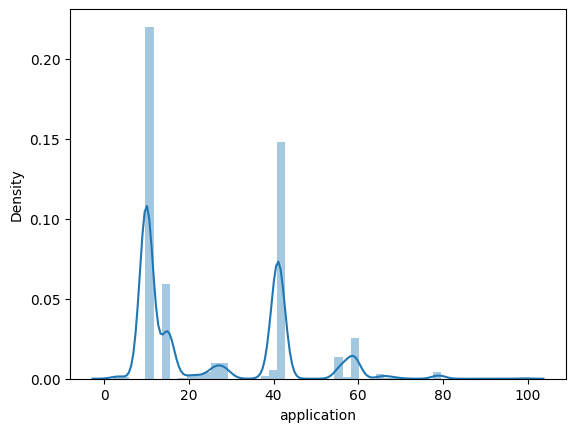

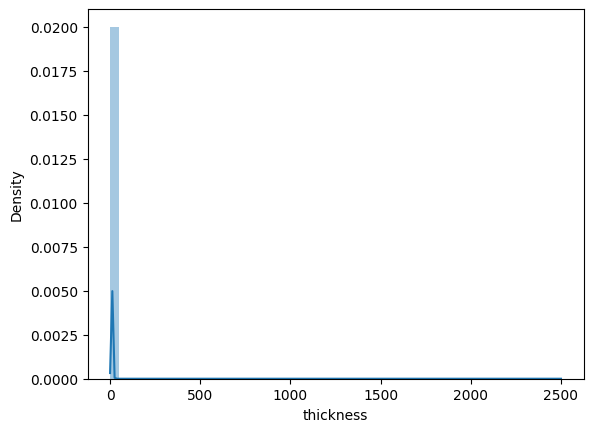

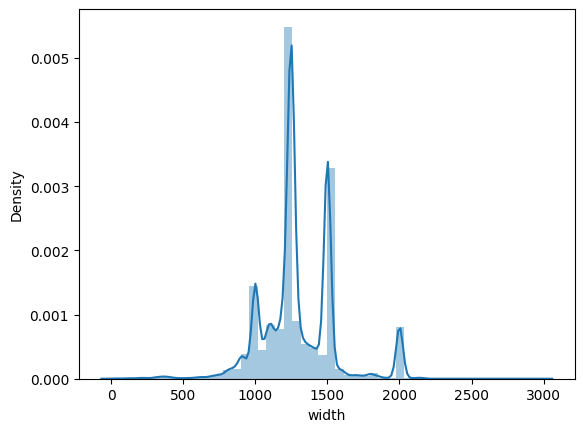

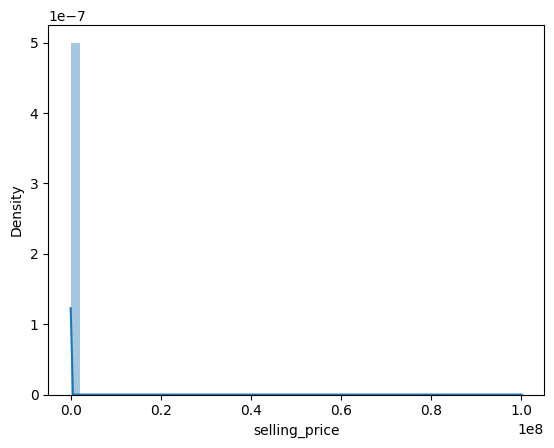

In [ ]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df['quantity tons']   # skewed
df['country']
df['application']
df['thickness']       # skewed
df['width']           
df['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['quantity tons'])
plt.show()
sns.distplot(df['country'])
plt.show()
sns.distplot(df['application'])
plt.show()
sns.distplot(df['thickness'])
plt.show()
sns.distplot(df['width'])
plt.show()
sns.distplot(df['selling_price'])
plt.show()